In [1]:
import numpy as np
import os
import torch
from PIL import Image, ImageDraw
import json

In [2]:
with open(os.path.join('./', 'TRAIN' + '_images.json'), 'r') as f:
    images = json.load(f)

with open(os.path.join('./', 'TRAIN' + '_objects.json'), 'r') as f:
    objects = json.load(f)

In [3]:
image = Image.open(images[0], mode='r').convert('RGB')

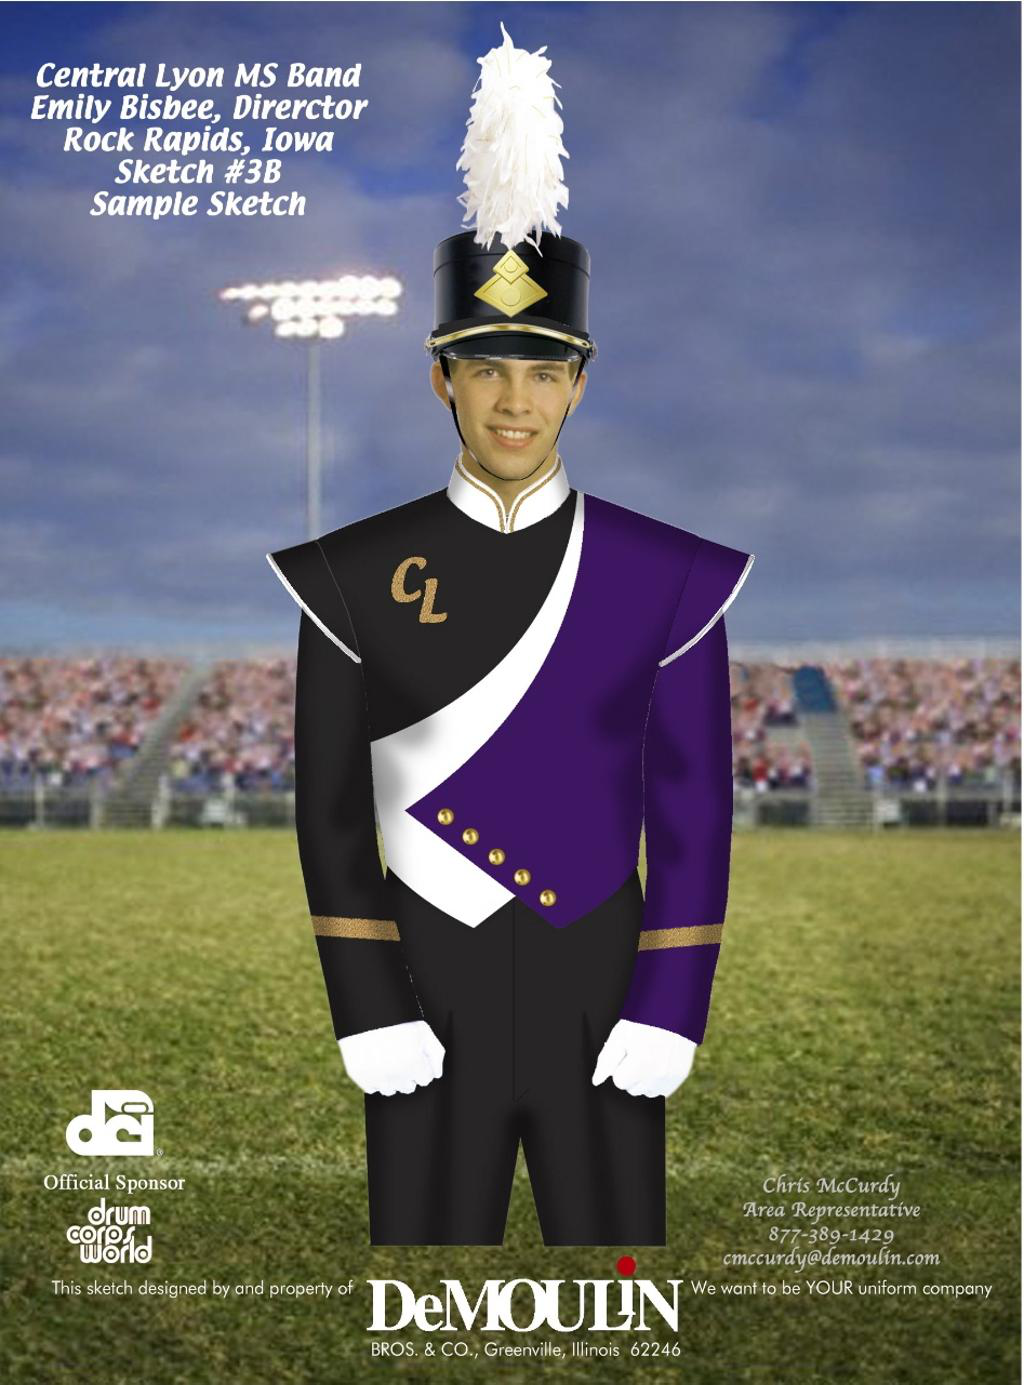

In [4]:
image

In [5]:
bbox = objects[0]['boxes']
labels = objects[0]['labels']

In [6]:
def draw_bbox(image, boxes):
    """image: a PIL image"""
    """boxes: list of (n, 4)"""
    draw = ImageDraw.Draw(image)
    for i in range(len(boxes)):
        draw.rectangle((boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]), outline='red', width=5)
    del draw

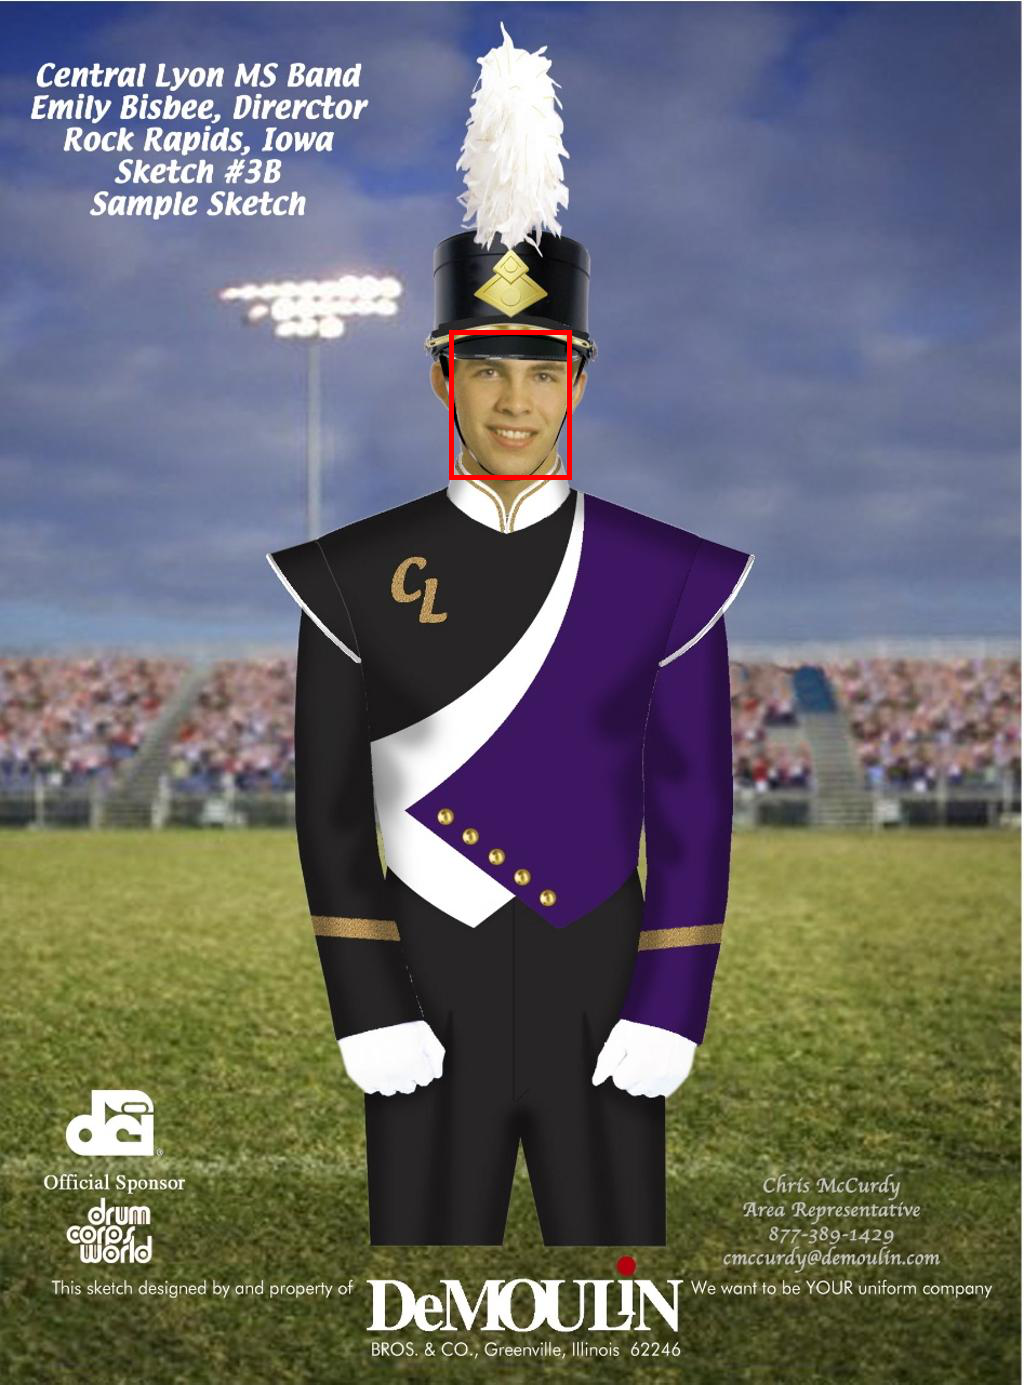

In [40]:
draw_bbox(image,bbox)
image

In [7]:
import utils
import torchvision.transforms.functional as FT
import random

In [8]:
image = Image.open(images[0], mode='r').convert('RGB')
image = utils.photometric_distort(image)

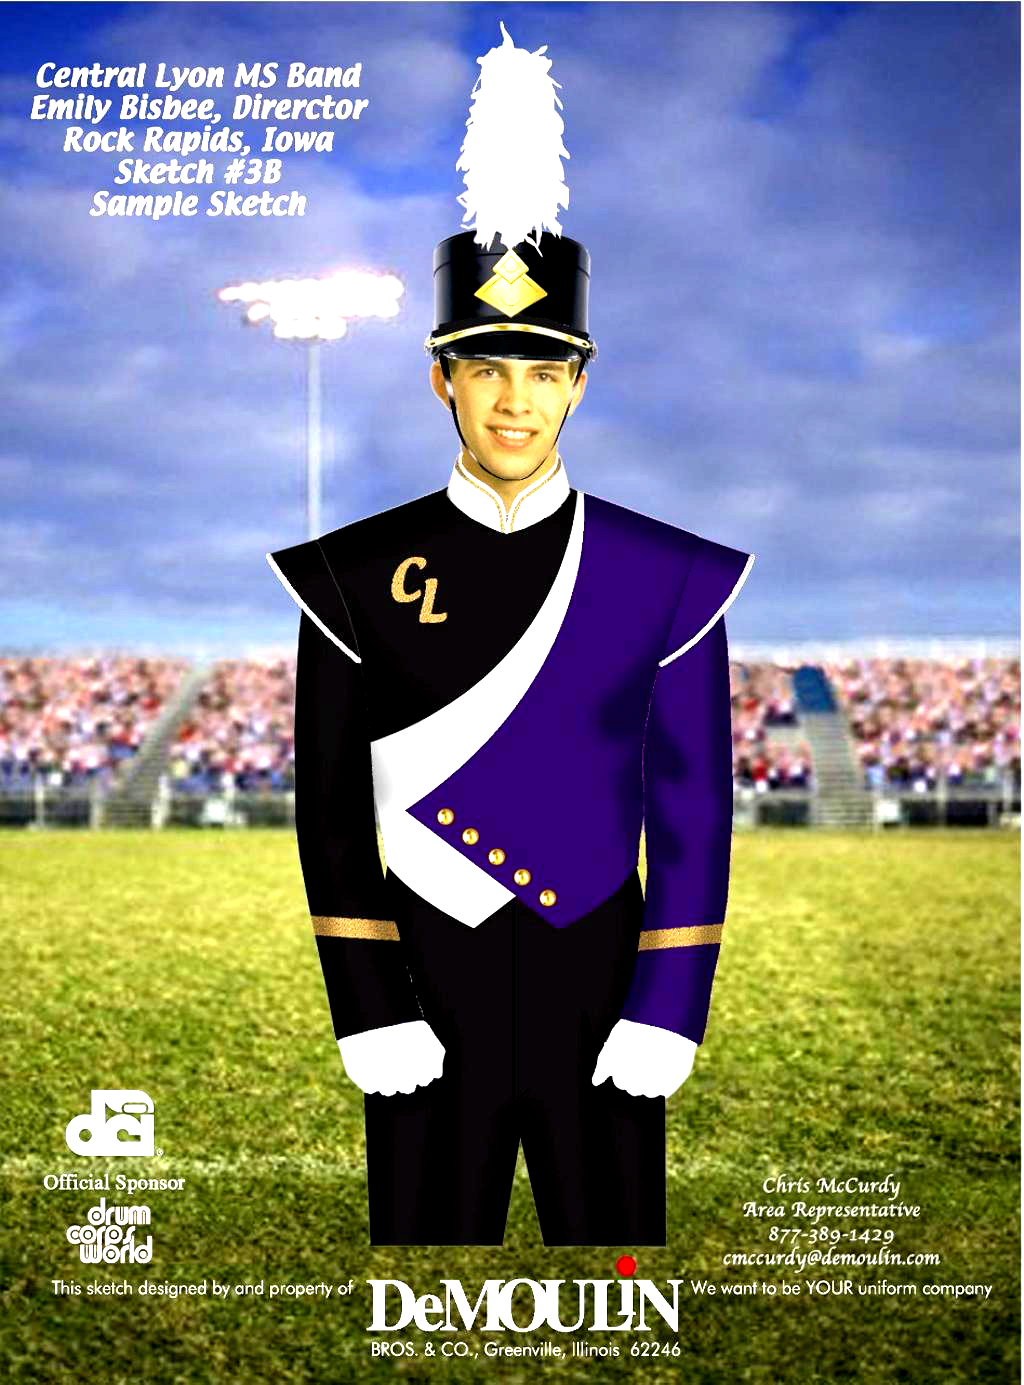

In [9]:
image

In [10]:
print(image.size)

(1024, 1385)


In [11]:
mean = [0.485, 0.456, 0.406]
image = FT.to_tensor(image)
boxes = torch.FloatTensor(bbox)
labels = torch.LongTensor(labels)

In [12]:
boxes

tensor([[449., 330., 571., 479.]])

In [13]:
labels

tensor([1])

In [38]:
new_image, new_boxes = utils.expand(image, boxes, filler=mean)

In [39]:
new_image.shape

torch.Size([3, 5072, 3750])

In [42]:
new_boxes

tensor([[2596., 2996., 2718., 3145.]])

In [40]:
new_image = FT.to_pil_image(new_image)

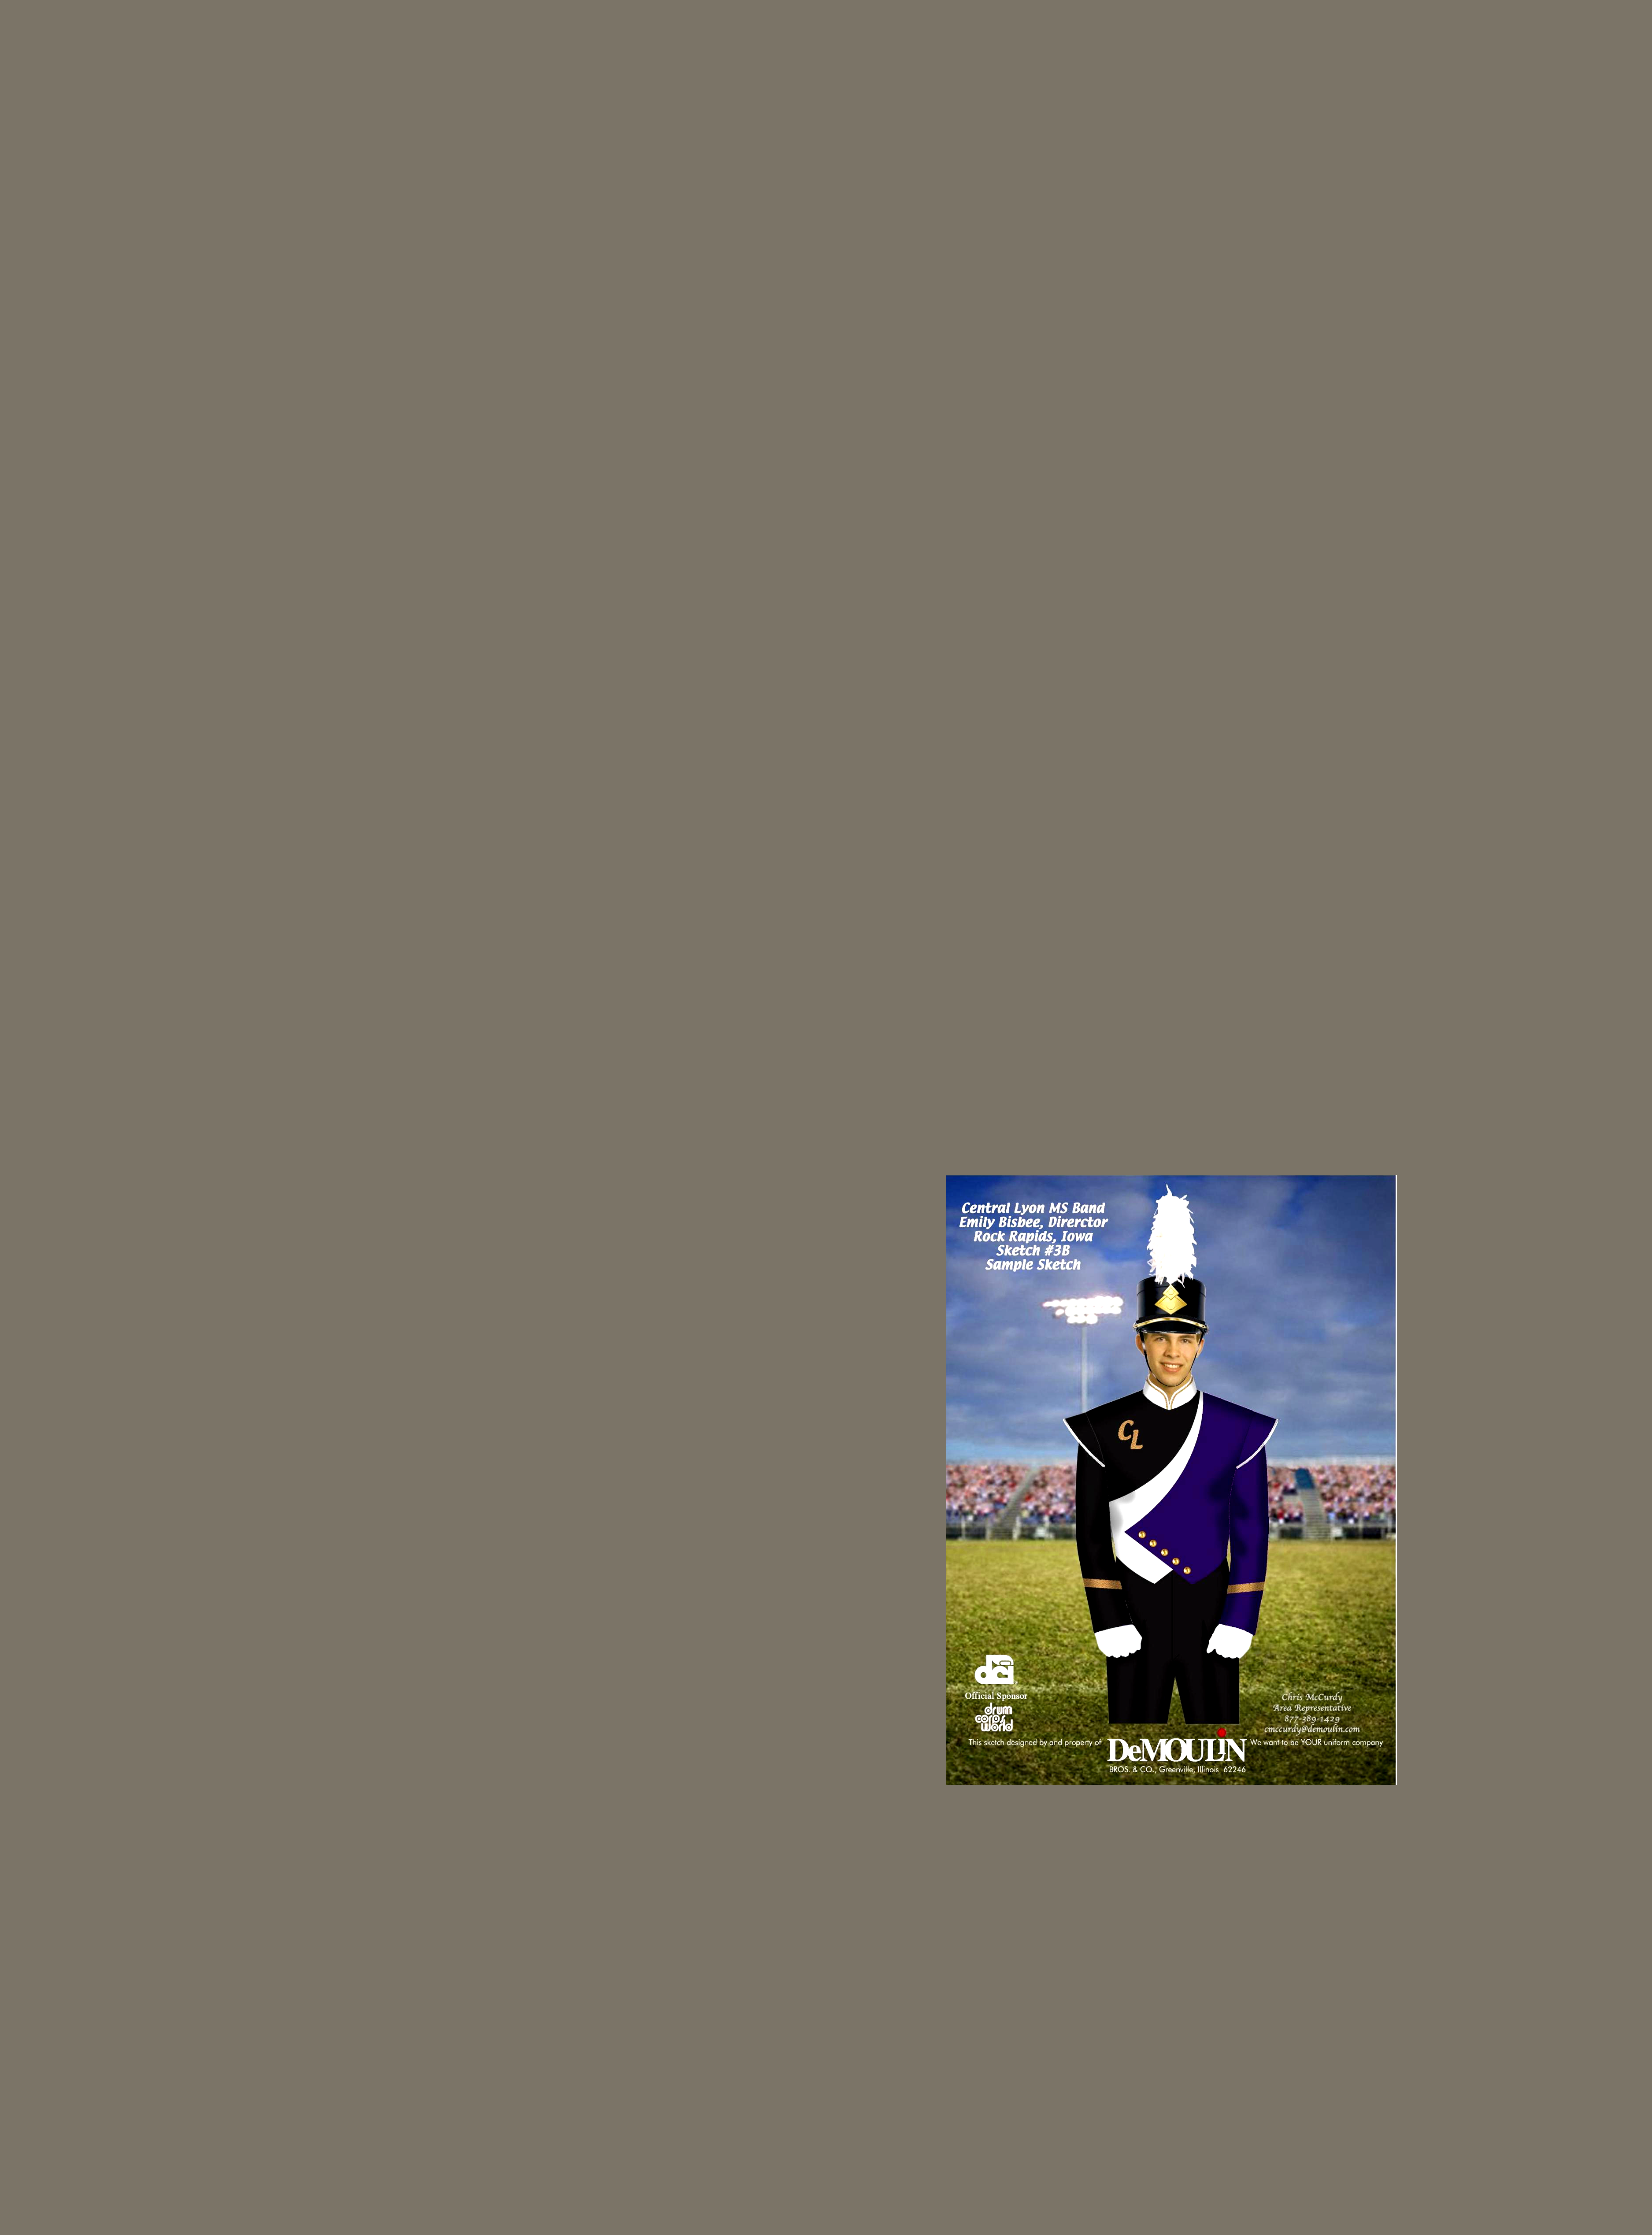

In [41]:
new_image

In [49]:
draw_bbox(new_image, new_boxes.numpy().tolist())

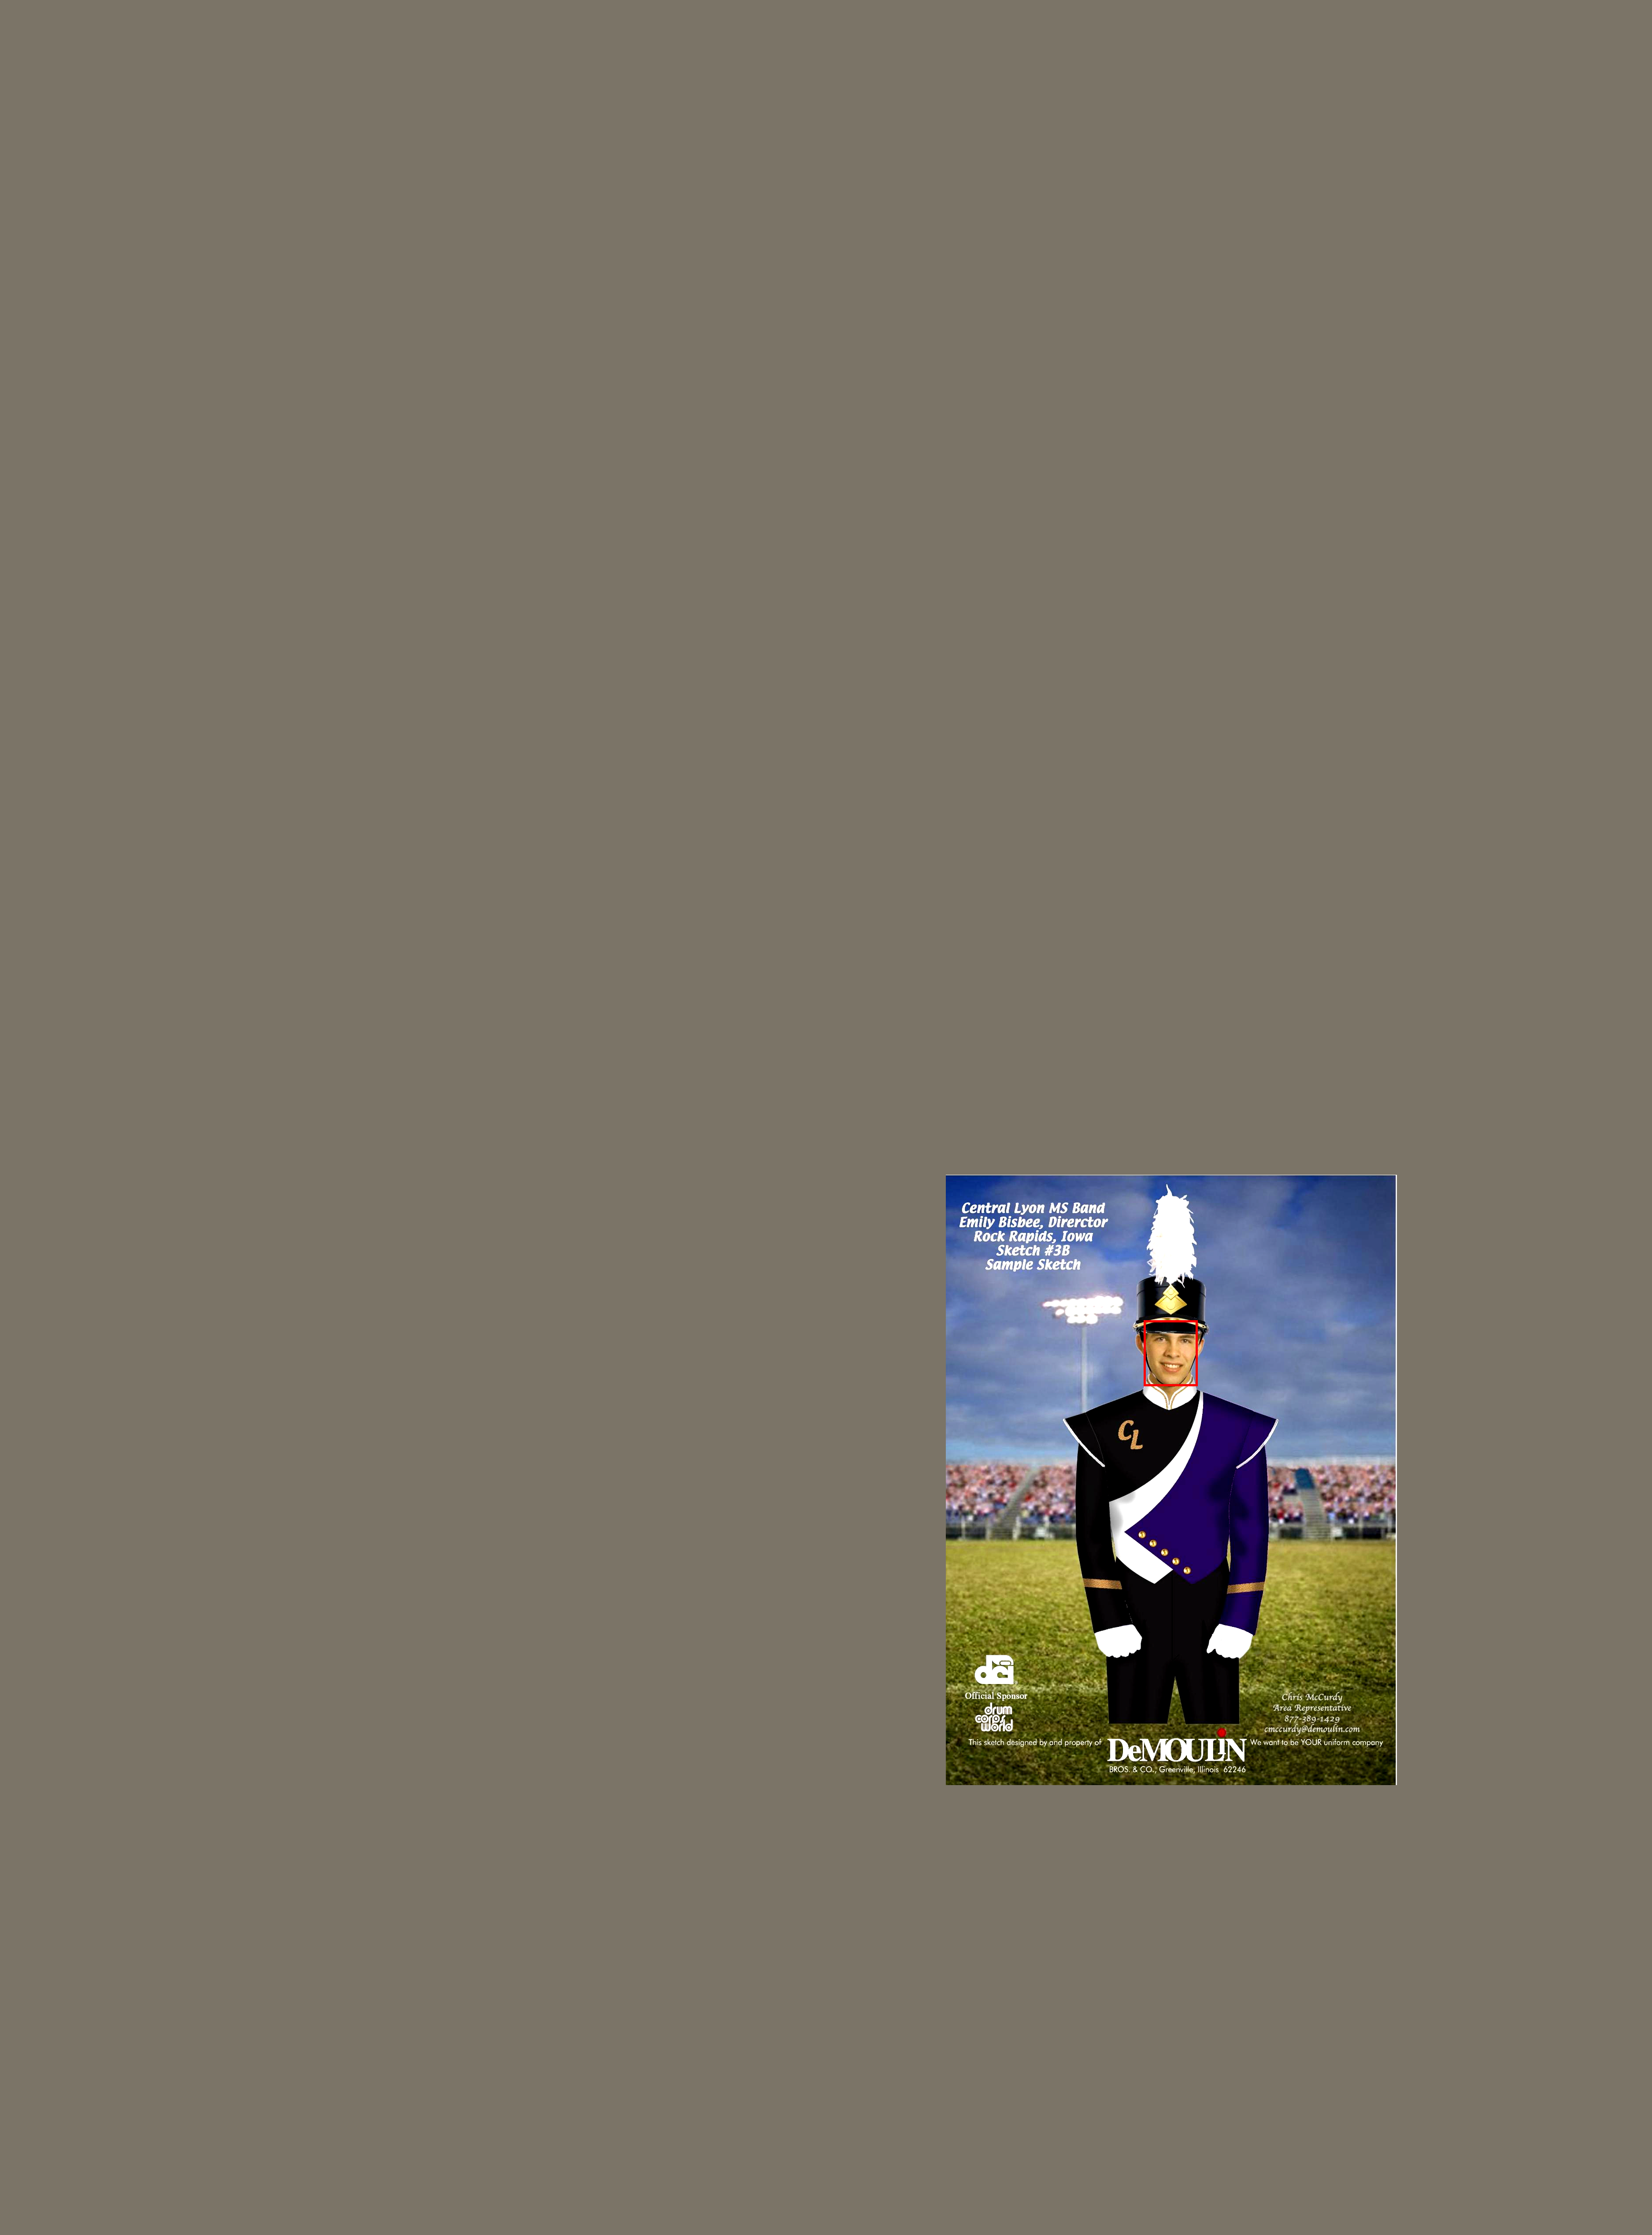

In [50]:
new_image

In [14]:
new_image, new_boxes, new_labels = utils.random_crop(image, boxes, labels)

In [15]:
new_image.shape

torch.Size([3, 519, 878])

In [16]:
new_image = FT.to_pil_image(new_image)

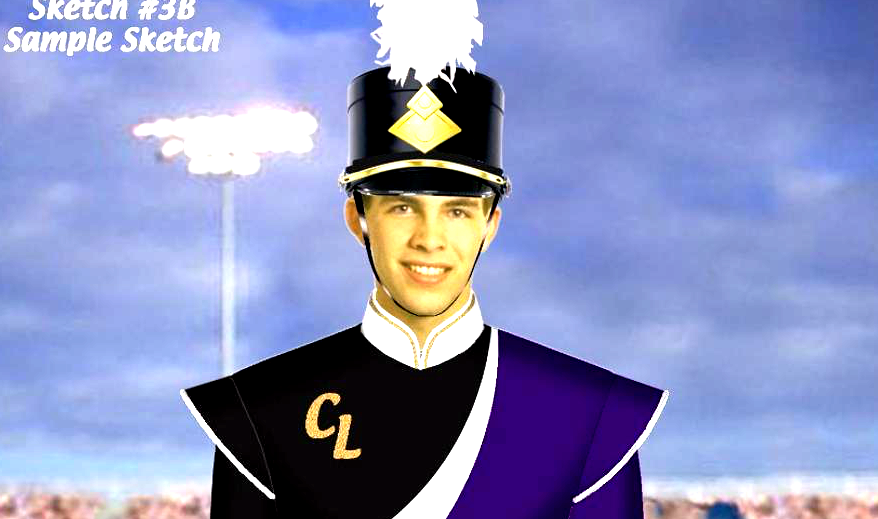

In [17]:
new_image

In [18]:
draw_bbox(new_image, new_boxes.numpy().tolist())

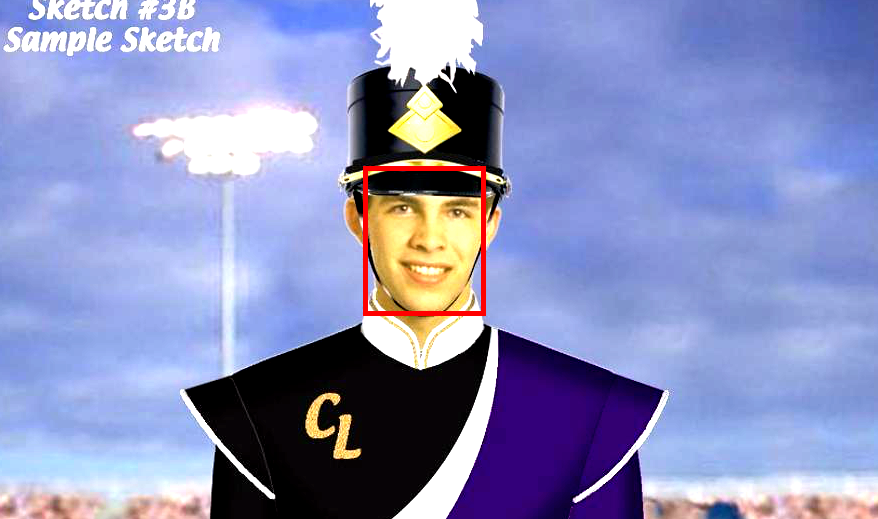

In [19]:
new_image